<a href="https://colab.research.google.com/github/francesco-source/DeepLearning/blob/main/1_mnistDense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mnist classification with NNs
A first example of a simple Neural Network, applied to a well known dataset.

In [28]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import utils
import tensorflow as tf
import numpy as np

Let us load the mnist dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print("pixel range is [{},{}]".format(np.min(x_train),np.max(x_train)))

(60000, 28, 28)
pixel range is [0,255]


We normalize the input in the range [0,1]

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train,(60000,28*28))
x_test = np.reshape(x_test,(10000,28*28))

The output of the network will be a proability distribution over the different categories. Similarly, we generate a ground truth distribution, and the training objective will consist in minimizing their distance (categorical crossentropy). The ground truth distribution is the so called "categorical" distribution: if x has label l, the corresponding categorical distribution has probaility 1 for the category l, and 0 for all the others.

In [5]:
#we use the categoricl rapresentation of the class
print(y_train[0])
y_train_cat = utils.to_categorical(y_train)
print(y_train_cat[0])
y_test_cat = utils.to_categorical(y_test)
# This is what we expect that the network will produce. 

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Our first Netwok just implements logistic regression

In [7]:
xin = Input(shape=(784)) # First layer, only one layer with this shape.
# 10 is the number of outputs of the dense layer, activation is the softmax(generalization of the logistic function).
res = Dense(10,activation='softmax') (xin) # We apply the dense layer to the input layer. We create the layer.
mynet = Model(inputs=xin,outputs=res) #inputs = could be a list of inputs and also outputs can be a list

In [8]:
mynet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


The None means that the beach dimension is unspecified. The network is able to work with any betch dimension. We have a dense network so we know that the parameters are all the possible connections. 784*10 + 1*10 biases links. 

Now we need to compile the network.
In order to do it, we need to pass two mandatory arguments:


*   the **optimizer**, in charge of governing the details of the backpropagation algorithm
*   the **loss function**

Several predefined optimizers exist, and you should just choose your favourite one. A common choice is Adam, implementing an adaptive lerning rate, with momentum

Optionally, we can specify additional metrics, mostly meant for monitoring the training process.

Th optimizer is usually a variant of SGD.

In [9]:
mynet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Finally, we fit the model over the trianing set. 

Fitting, just requires two arguments: training data e ground truth, that is x and y. Additionally we can specify epochs, batch_size, and many additional arguments.

In particular, passing validation data allow the training procedure to measure loss and metrics on the validation set at the end of each epoch.

In [10]:
# batch size, amount of data that we want to process in parallel. Largest batch size possible is usually a good idea. 
# Here we are using test set as validation. Is cheading but only for teaching purpouses we do so. 
mynet.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 0.4745 - accuracy: 0.8755 - val_loss: 0.3106 - val_accuracy: 0.9165
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3043 - accuracy: 0.9148 - val_loss: 0.2849 - val_accuracy: 0.9198
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2836 - accuracy: 0.9203 - val_loss: 0.2795 - val_accuracy: 0.9214
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2733 - accuracy: 0.9232 - val_loss: 0.2767 - val_accuracy: 0.9223
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2667 - accuracy: 0.9255 - val_loss: 0.2655 - val_accuracy: 0.9270
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2621 - accuracy: 0.9269 - val_loss: 0.2642 - val_accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2582 - accuracy: 0.9287 - val_loss: 0.2674 - val_accuracy

Now we try to add more layers and do a better logistic regression. We can so add intermidiet layers. Now we use tree layers. And i can choose the size. Softmax is usally used only for the final layes. Relu is used for intermediet layers. You can specify an activation as an additional layer if you want.

In [11]:
xin = Input(shape=(784))
x = Dense(128,activation='relu')(xin)
res = Dense(10,activation='softmax')(x)
# X2 = Dense(100)(x)
# X3 = Activation(activation = "relu")(X2)

mynet2 = Model(inputs=xin,outputs=res)

In [12]:
mynet2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
mynet2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
mynet2.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2576 - accuracy: 0.9265 - val_loss: 0.1317 - val_accuracy: 0.9614
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1148 - accuracy: 0.9667 - val_loss: 0.1025 - val_accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0780 - accuracy: 0.9768 - val_loss: 0.0895 - val_accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0588 - accuracy: 0.9823 - val_loss: 0.0833 - val_accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0442 - accuracy: 0.9868 - val_loss: 0.0833 - val_accuracy: 0.9751
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0696 - val_accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0285 - accuracy: 0.9913 - val_loss: 0.0727 - val_accuracy:

An amazing improvement. WOW!

In [14]:
mynet.save_weights("my_file")
mynet2.save_weights("my_file")

# Exercises

1.   Add additional Dense layers and check the performance of the network
2.   Replace 'relu' with different activation functions
3. Adapt the network to work with the so called sparse_categorical_crossentropy
4. the fit function return a history of training, with temporal sequences for all different metrics. Make a plot.

\\

In [20]:
xin = Input(shape=(784))
res = Dense(10,activation='relu') (xin) 

res2 = Dense(10,activation = "softmax")(res)

mynet_3 = Model(inputs=xin,outputs=res2)

In [21]:
mynet_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
mynet_3.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5067 - accuracy: 0.8537 - val_loss: 0.3061 - val_accuracy: 0.9133
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2859 - accuracy: 0.9178 - val_loss: 0.2677 - val_accuracy: 0.9208
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2598 - accuracy: 0.9254 - val_loss: 0.2543 - val_accuracy: 0.9272
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2472 - accuracy: 0.9297 - val_loss: 0.2485 - val_accuracy: 0.9284
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2388 - accuracy: 0.9309 - val_loss: 0.2513 - val_accuracy: 0.9275
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2320 - accuracy: 0.9342 - val_loss: 0.2388 - val_accuracy: 0.9343
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2271 - accuracy: 0.9358 - val_loss: 0.2375 - val_accuracy:

### 2. Replacing relu with different activation functions

In [24]:
xin = Input(shape=(784))
res = Dense(10,activation='softplus') (xin) 
res2 = Dense(10,activation = "softmax")(res)
mynet_3 = Model(inputs=xin,outputs=res2)

mynet_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
mynet_3.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5447 - accuracy: 0.8446 - val_loss: 0.3114 - val_accuracy: 0.9117
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3035 - accuracy: 0.9153 - val_loss: 0.2846 - val_accuracy: 0.9220
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2804 - accuracy: 0.9217 - val_loss: 0.2715 - val_accuracy: 0.9257
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2669 - accuracy: 0.9256 - val_loss: 0.2690 - val_accuracy: 0.9250
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2561 - accuracy: 0.9293 - val_loss: 0.2625 - val_accuracy: 0.9249
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2483 - accuracy: 0.9299 - val_loss: 0.2607 - val_accuracy: 0.9278
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2401 - accuracy: 0.9320 - val_loss: 0.2545 - val_accuracy:

In [25]:
xin = Input(shape=(784))
res = Dense(10,activation='sigmoid') (xin) 
res2 = Dense(10,activation = "softmax")(res)
mynet_3 = Model(inputs=xin,outputs=res2)

mynet_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
mynet_3.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9300 - accuracy: 0.8106 - val_loss: 0.4944 - val_accuracy: 0.8878
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4192 - accuracy: 0.8958 - val_loss: 0.3592 - val_accuracy: 0.9039
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3372 - accuracy: 0.9089 - val_loss: 0.3118 - val_accuracy: 0.9148
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3015 - accuracy: 0.9162 - val_loss: 0.2885 - val_accuracy: 0.9194
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2803 - accuracy: 0.9218 - val_loss: 0.2720 - val_accuracy: 0.9238
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2653 - accuracy: 0.9246 - val_loss: 0.2637 - val_accuracy: 0.9245
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2534 - accuracy: 0.9288 - val_loss: 0.2522 - val_accuracy:

In [26]:
xin = Input(shape=(784))
res = Dense(10,activation='tanh') (xin) 
res2 = Dense(10,activation = "softmax")(res)
mynet_3 = Model(inputs=xin,outputs=res2)

mynet_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
mynet_3.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6047 - accuracy: 0.8500 - val_loss: 0.3431 - val_accuracy: 0.9034
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3186 - accuracy: 0.9103 - val_loss: 0.2862 - val_accuracy: 0.9204
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2806 - accuracy: 0.9206 - val_loss: 0.2696 - val_accuracy: 0.9221
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2613 - accuracy: 0.9250 - val_loss: 0.2551 - val_accuracy: 0.9261
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2492 - accuracy: 0.9288 - val_loss: 0.2504 - val_accuracy: 0.9276
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2384 - accuracy: 0.9313 - val_loss: 0.2466 - val_accuracy: 0.9290
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2308 - accuracy: 0.9331 - val_loss: 0.2406 - val_accuracy:

In [27]:
xin = Input(shape=(784))
res = Dense(10,activation='elu') (xin) #reduces the effect of the vanishing of the gradient
res2 = Dense(10,activation = "softmax")(res)
mynet_3 = Model(inputs=xin,outputs=res2)

mynet_3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
mynet_3.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4997 - accuracy: 0.8636 - val_loss: 0.3067 - val_accuracy: 0.9121
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2922 - accuracy: 0.9178 - val_loss: 0.2671 - val_accuracy: 0.9245
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2606 - accuracy: 0.9266 - val_loss: 0.2556 - val_accuracy: 0.9281
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2409 - accuracy: 0.9312 - val_loss: 0.2393 - val_accuracy: 0.9323
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2280 - accuracy: 0.9357 - val_loss: 0.2395 - val_accuracy: 0.9316
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2192 - accuracy: 0.9375 - val_loss: 0.2268 - val_accuracy: 0.9343
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2123 - accuracy: 0.9397 - val_loss: 0.2223 - val_accuracy:

### 3. Sparce cathegorical crossentropy

In [57]:
xin = Input(shape=(784))
res = Dense(10, activation='elu')(xin)
res2 = Dense(10, activation="softmax")(res)
mynet_3 = Model(inputs=xin, outputs=res2)

mynet_3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = mynet_3.fit(x_train, y_train, shuffle=True, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4945 - accuracy: 0.8623 - val_loss: 0.3042 - val_accuracy: 0.9118
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2983 - accuracy: 0.9139 - val_loss: 0.2721 - val_accuracy: 0.9190
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2709 - accuracy: 0.9234 - val_loss: 0.2660 - val_accuracy: 0.9243
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2568 - accuracy: 0.9275 - val_loss: 0.2530 - val_accuracy: 0.9261
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2462 - accuracy: 0.9296 - val_loss: 0.2518 - val_accuracy: 0.9260
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2391 - accuracy: 0.9322 - val_loss: 0.2442 - val_accuracy: 0.9302
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2329 - accuracy: 0.9338 - val_loss: 0.2420 - val_accuracy:

### 4. Make a plot 

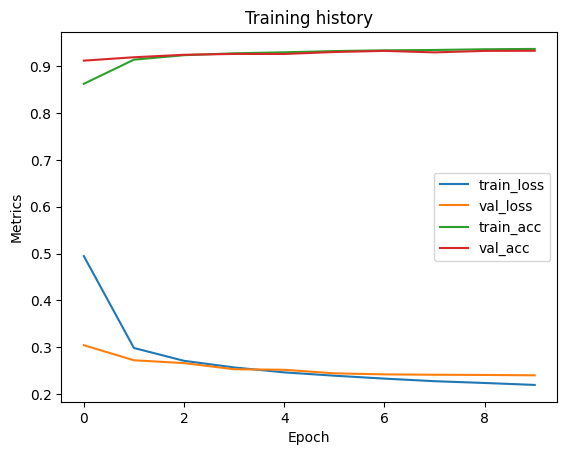

In [59]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training history')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.show()